# Sysmon - Explore ATT&CK Data Sources
------------------

## Goals:
* Access ATT&CK data sources in STIX format via a public TAXII server
* Learn to interact with ATT&CK data all at once
* Explore and idenfity patterns in the data retrieved
* Learn more about ATT&CK data sources

## 1. Import Python Libraries

In [73]:
# Importing library to manipulate data
import pandas as pd

# Importing library to manipulate yaml data
import yaml
import requests

# Importing library for visualizations
from openhunt import visualizations as vis

## 2. Importing (Sub)Techniques to Security Events Mapping Yaml File

Using the **[attackcti](https://attackcti.com/intro.html)** Python library, we were able to collect all the techniques within the Enterprise matrix. After that, we mapped several security events to each data source/component/relationship. Here is the result:

In [74]:
yamlUrl = 'https://raw.githubusercontent.com/OTRF/OSSEM-DM/main/use-cases/mitre_attack/techniques_to_events_mapping.yaml'
yamlContent = requests.get(yamlUrl)
yamlMapping = yaml.safe_load(yamlContent.text)
mapping = pd.json_normalize(yamlMapping)
mapping.head()

,technique_id,x_mitre_is_subtechnique,technique,tactic,platform,data_source,data_component,name,source,relationship,target,event_id,event_name,event_platform,audit_category,audit_sub_category,log_channel,log_provider,filter_in,filter_in.ObjectType
0,T1553.006,True,Code Signing Policy Modification,[defense-evasion],"[Windows, macOS]",windows registry,windows registry key modification,Process modified Windows registry key,process,modified,windows registry key,13,RegistryEvent (Value Set).,Windows,RegistryEvent,NaN,Microsoft-Windows-Sysmon/Operational,Microsoft-Windows-Sysmon,NaN,NaN
1,T1553.006,True,Code Signing Policy Modification,[defense-evasion],"[Windows, macOS]",windows registry,windows registry key modification,Process modified Windows registry key,process,modified,windows registry key,14,RegistryEvent (Key and Value Rename).,Windows,RegistryEvent,NaN,Microsoft-Windows-Sysmon/Operational,Microsoft-Windows-Sysmon,NaN,NaN
2,T1553.006,True,Code Signing Policy Modification,[defense-evasion],"[Windows, macOS]",windows registry,windows registry key modification,Process modified Windows registry key,process,modified,windows registry key,4670,Permissions on an object were changed.,Windows,Object Access,Registry,Security,Microsoft-Windows-Security-Auditing,NaN,NaN
3,T1553.006,True,Code Signing Policy Modification,[defense-evasion],"[Windows, macOS]",windows registry,windows registry key modification,Process modified Windows registry key,process,modified,windows registry key,RegistryKeyCreated,RegistryKeyCreated,Windows,None,NaN,DeviceRegistryEvents,Microsoft Defender for Endpoint,NaN,NaN
4,T1553.006,True,Code Signing Policy Modification,[defense-evasion],"[Windows, macOS]",windows registry,windows registry key modification,Process modified Windows registry key value,process,modified,windows registry key value,13,RegistryEvent (Value Set).,Windows,RegistryEvent,NaN,Microsoft-Windows-Sysmon/Operational,Microsoft-Windows-Sysmon,NaN,NaN


### Which are the most relevant data sources for Sub-Technqiues within the Enterprise Matrix?

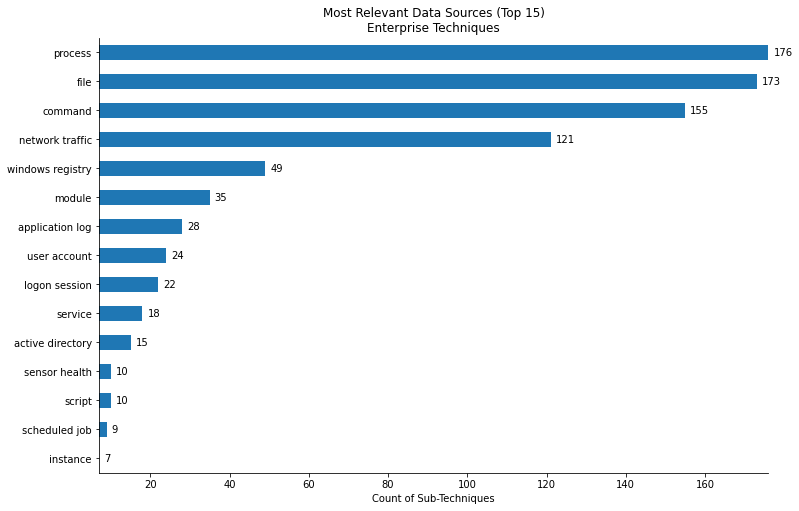

In [75]:
enterprise_sub = mapping[mapping['x_mitre_is_subtechnique'] == True][['technique_id','data_source','data_component']].drop_duplicates()
top15_data_source = enterprise_sub['data_source'].value_counts().nlargest(15).to_frame().reset_index()
title = 'Most Relevant Data Sources (Top 15)\nEnterprise Techniques'
vis.barh_chart(top15_data_source,'data_source','index',title, xlabel = 'Count of Sub-Techniques')

## 3. Getting Only Linux Techniques

C:\Users\rorodri\AppData\Local\Programs\Python\Python39\lib\site-packages\openhunt\visualizations.py:48: UserWarning: Attempting to set identical left == right == 1 results in singular transformations; automatically expanding.
  ax.set_xlim(min_freq, max_freq) # expand xlim to make labels easier to read


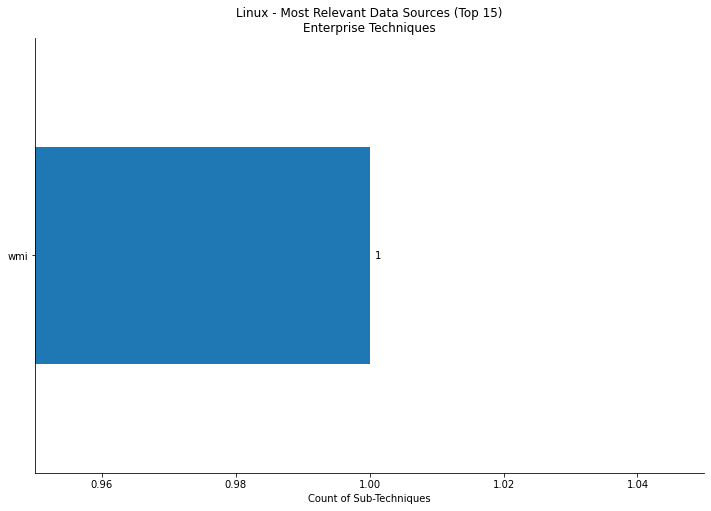

In [150]:
filter_df = (mapping['x_mitre_is_subtechnique'] == True) & \
    (mapping['platform'].apply(lambda x: 'Windows' in x)) & \
    (mapping['data_source'].apply(lambda  x: 'wmi' in str(x).lower()))
linux_enterprise_sub = mapping[filter_df][['technique_id','data_source','data_component']].drop_duplicates()
top15_data_source = linux_enterprise_sub['data_source'].value_counts().nlargest(50).to_frame().reset_index()
title = 'Linux - Most Relevant Data Sources (Top 15)\nEnterprise Techniques'
vis.barh_chart(top15_data_source,'data_source','index',title, xlabel = 'Count of Sub-Techniques')

In [171]:
filter_df = (mapping['x_mitre_is_subtechnique'] == False) & (mapping['platform'].apply(lambda  x: 'Linux' in x))
    #(mapping['platform'].apply(lambda x: 'Windows' in x)) & \
    #(mapping['data_source'].apply(lambda  x: 'wmi' in str(x)))
t = mapping[filter_df]

In [172]:
len(t)

4061

In [173]:
t

,technique_id,x_mitre_is_subtechnique,technique,tactic,platform,data_source,data_component,name,source,relationship,target,event_id,event_name,event_platform,audit_category,audit_sub_category,log_channel,log_provider,filter_in,filter_in.ObjectType
31,T1614,False,System Location Discovery,[discovery],"[Windows, Linux, macOS, IaaS]",instance,instance metadata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,T1614,False,System Location Discovery,[discovery],"[Windows, Linux, macOS, IaaS]",process,process creation,Process created Process,process,created,process,4688,A new process has been created.,Windows,Detailed Tracking,Process Creation,Security,Microsoft-Windows-Security-Auditing,NaN,NaN
33,T1614,False,System Location Discovery,[discovery],"[Windows, Linux, macOS, IaaS]",process,process creation,Process created Process,process,created,process,1,Process Creation.,Windows,ProcessCreate,NaN,Microsoft-Windows-Sysmon/Operational,Microsoft-Windows-Sysmon,NaN,NaN
34,T1614,False,System Location Discovery,[discovery],"[Windows, Linux, macOS, IaaS]",process,process creation,Process created Process,process,created,process,1,Process Creation.,Linux,ProcessCreate,NaN,Linux-Sysmon/Operational,Linux-Sysmon,NaN,NaN
35,T1614,False,System Location Discovery,[discovery],"[Windows, Linux, macOS, IaaS]",process,process creation,Process created Process,process,created,process,ProcessCreated,ProcessCreated,Windows,None,NaN,DeviceProcessEvents,Microsoft Defender for Endpoint,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12515,T1003,False,OS Credential Dumping,[credential-access],"[Windows, Linux, macOS]",network traffic,network traffic flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12516,T1003,False,OS Credential Dumping,[credential-access],"[Windows, Linux, macOS]",network traffic,network traffic content,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12517,T1003,False,OS Credential Dumping,[credential-access],"[Windows, Linux, macOS]",process,os api execution,Process executed Api call,process,executed,api call,8,CreateRemoteThread.,Windows,CreateRemoteThread,NaN,Microsoft-Windows-Sysmon/Operational,Microsoft-Windows-Sysmon,NaN,NaN
12518,T1003,False,OS Credential Dumping,[credential-access],"[Windows, Linux, macOS]",process,os api execution,Process executed Api call,process,executed,api call,CreateRemoteThreadApiCall,CreateRemoteThreadApiCall,Windows,None,NaN,DeviceEvents,Microsoft Defender for Endpoint,NaN,NaN
